<a href="https://colab.research.google.com/github/AnaFerreira015/dip-2024-2/blob/main/Atividade_16_Afinamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [31]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
_, binary = cv2.threshold(image, 127, 1, cv2.THRESH_BINARY_INV)

Saving horse.png to horse.png


In [32]:
base_kernels = [
    np.array([[0, 0, 0],
              [-1, 1, -1],
              [1, 1, 1]]),

    np.array([[-1, 0, 0],
              [1, 1, 0],
              [-1, 1, -1]]),

    np.array([[1, 1, 1],
              [-1, 1, -1],
              [0, 0, 0]]),

    np.array([[-1, 1, -1],
              [0, 1, 1],
              [0, 0, -1]])
]

In [34]:
def generate_rotations(kernels):
    rotated = []
    for k in kernels:
        for i in range(4):
            rotated.append(np.rot90(k, i))
    return rotated

In [35]:
kernels = generate_rotations(base_kernels)

In [36]:
def hit_or_miss(img, kernel):
    hit = cv2.erode((img == 1).astype(np.uint8), (kernel == 1).astype(np.uint8))
    miss = cv2.erode((img == 0).astype(np.uint8), (kernel == 0).astype(np.uint8))
    return cv2.bitwise_and(hit, miss)

In [37]:
thinned = binary.copy()
while True:
    prev = thinned.copy()
    for kernel in kernels:
        match = hit_or_miss(thinned, kernel)
        thinned = cv2.subtract(thinned, match)
    if np.array_equal(prev, thinned):
        break

In [38]:
result = (1 - thinned) * 255

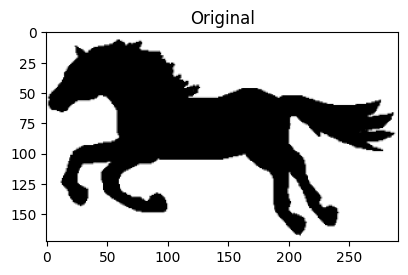

In [39]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

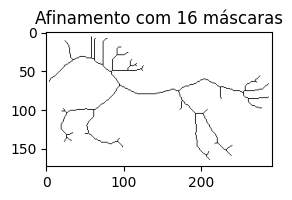

In [40]:
plt.subplot(1, 2, 2)
plt.title('Afinamento com 16 máscaras')
plt.imshow(result, cmap='gray')
plt.show()